In [45]:
# Analysis of perf data.
# To identify the frequency at which Energy per Instruction (EPI) is lowest when the CPU is at 100 %.
# Tools used: `perf`, `turbostat`, `stress`
# How test was done: Used stress test, specifically `stress -c 4 -t 6s for 50 times at each step of frequency.
# Frequency steps: 400 MHz to 1800 MHz : step size : 100 MHz
# CPU under test: Intel(R) Core(TM) i5-6260U CPU @ 1.80GHz
# DVFS used - Intel pstate

# parameters collected:
    # task-clock               
    # page-faults                
    # cycles                     
    # instructions               
    # branches                   
    # branch-misses              
    # L1-dcache-loads            
    # L1-dcache-misses           
    # cpu/cache-misses/          
    # LLC-loads                  
    # LLC-misses                 
    # cpu/cache-references/      
    # power/energy-cores/      
    # Frequency(MHz)

# Result:
    # EPI was lowest at 800 MHZ, where are average EPI was at 700 MHZ when the CPU utilization was at 100 %
    # Top 6 features having high correlation with Energy per Instructions (EPI) are:: 
        # cycles 0.862906016532
        # instructions 0.862620032035
        # branches 0.862531469079
        # branch-misses 0.860568043098
        # L1-dcache-loads 0.862659793978
        # inst/l1_misses 0.687460775131

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
%matplotlib inline

In [47]:
# processing all the EPI files
fdf = pd.read_csv("./log/processed/EPI_ALL.csv", index_col=0)

In [48]:
fdf = fdf.sort_values("Frequency(Mhz)")
fdf.head()
fdf["Frequency(MHz)"] = fdf["Frequency(Mhz)"]
fdf = fdf.drop("Frequency(Mhz)", axis=1)
fdf["EPI2"] = fdf["EPI"]/fdf["instructions"]

In [49]:
# split dataset into x and y
X = fdf[['page-faults', 'cycles', 'instructions', 'branches', 
                    'branch-misses', 'L1-dcache-loads', 'L1-dcache-misses',
                    'cpu/cache-misses/', 'LLC-loads', 'LLC-misses', 'cpu/cache-references/','Frequency(MHz)']]
y = fdf['EPI']

# split into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2688)

In [50]:
fdf.dtypes

task-clock               float64
page-faults                int64
cycles                     int64
instructions               int64
branches                   int64
branch-misses              int64
L1-dcache-loads            int64
L1-dcache-misses           int64
cpu/cache-misses/          int64
LLC-loads                  int64
LLC-misses                 int64
cpu/cache-references/      int64
power/energy-cores/      float64
EPI                      float64
Frequency(MHz)             int64
EPI2                     float64
dtype: object

In [51]:
fdf.describe()

,task-clock,page-faults,cycles,instructions,branches,branch-misses,L1-dcache-loads,L1-dcache-misses,cpu/cache-misses/,LLC-loads,LLC-misses,cpu/cache-references/,power/energy-cores/,EPI,Frequency(MHz),EPI2
count,780.000000,780.000000,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,780.000000,7.800000e+02,780.000000,7.800000e+02
mean,24003.578841,841.173077,2.622199e+10,3.681845e+10,1.089902e+10,2.258473e+07,1.091292e+10,2.886218e+06,1.862559e+06,6.983646e+05,1.349156e+05,7.401156e+06,18.062962,4.814976e-10,1100.000000,1.571704e-20
std,143.300723,1174.857917,1.034776e+10,1.455632e+10,4.314139e+09,8.757611e+06,4.314476e+09,3.164726e+06,1.697095e+06,7.752782e+05,1.550081e+05,7.611996e+06,8.043862,2.671075e-11,432.326601,7.537834e-21
min,20008.573287,134.000000,9.469492e+09,1.306897e+10,3.820793e+09,8.190800e+06,3.848950e+09,1.395711e+06,6.127720e+05,2.969440e+05,3.903000e+04,2.714746e+06,6.240000,4.451916e-10,400.000000,8.771055e-21
25%,24005.505304,144.750000,1.666062e+10,2.339009e+10,6.925633e+09,1.434411e+07,6.935927e+09,1.786200e+06,1.216796e+06,4.120832e+05,8.298850e+04,4.531296e+06,10.530000,4.604745e-10,700.000000,1.005485e-20
50%,24006.963898,735.500000,2.622598e+10,3.683036e+10,1.090609e+10,2.246512e+07,1.091794e+10,1.972788e+06,1.498720e+06,4.674650e+05,1.047145e+05,5.214445e+06,17.160000,4.763036e-10,1100.000000,1.264525e-20
75%,24010.498143,946.000000,3.578507e+10,5.028268e+10,1.489437e+10,3.042512e+07,1.490977e+10,2.235412e+06,1.911200e+06,5.566605e+05,1.315690e+05,6.192166e+06,25.190000,5.016384e-10,1500.000000,1.924594e-20
max,24048.138312,19111.000000,4.300290e+10,6.083427e+10,1.802085e+10,5.004714e+07,1.802633e+10,3.214796e+07,2.081310e+07,4.966506e+06,1.986557e+06,5.413530e+07,33.790000,5.598151e-10,1800.000000,3.711989e-20


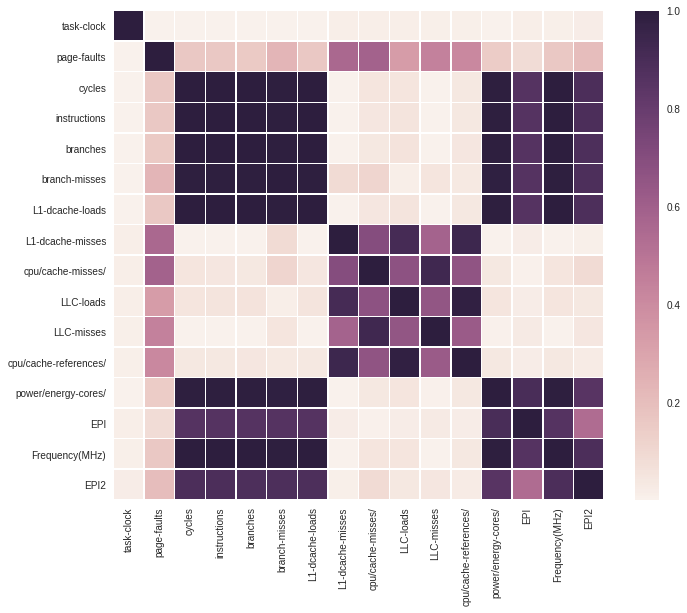

In [52]:
# Let's plot the correlation plot to see which all parameteres are related with each other
# correlation
corr = fdf.corr().abs()
plt.figure(figsize=(11,9))
sns.heatmap(corr, linewidths=0.5)

In [53]:
# Let's find the components that correlate to Energy per instruction the most (more than 50% and less than 100%)
corr.sort_values("EPI", ascending=False)["EPI"][(corr["EPI"] > 0.5) & (corr["EPI"] < 0.9)]

cycles             0.862906
Frequency(MHz)     0.862761
L1-dcache-loads    0.862660
instructions       0.862620
branches           0.862531
branch-misses      0.860568
EPI2               0.542517
Name: EPI, dtype: float64

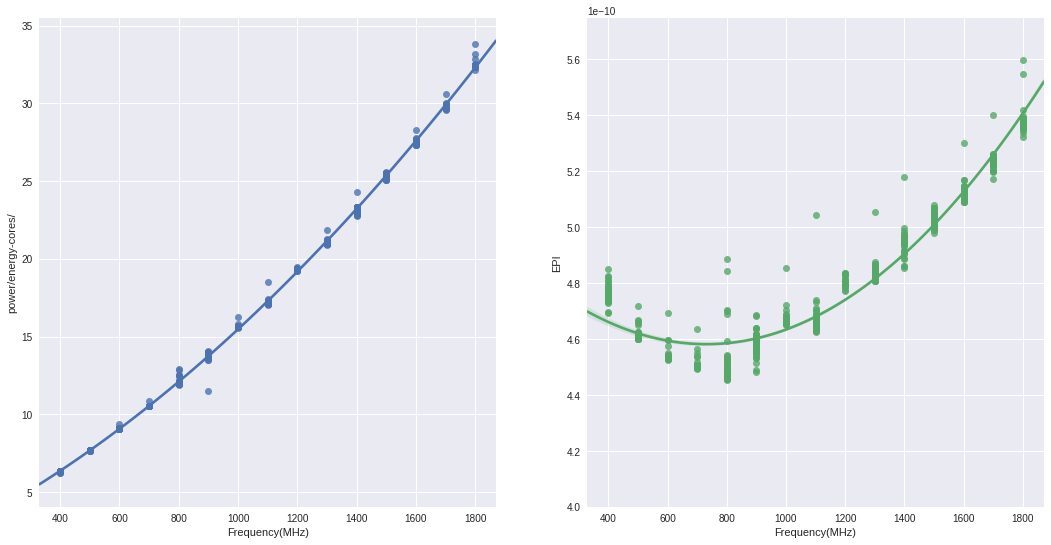

In [54]:
#Let's try to do a scatter plot between frequency vs power and frequency vs EPI
fig, axs = plt.subplots(ncols=2, figsize=(18, 9))
axs[1].set(ylim=(4e-10, 5.75e-10))
sns.regplot(x="Frequency(MHz)", y="power/energy-cores/", data=fdf, order=2, ax=axs[0])
sns.regplot(x=fdf["Frequency(MHz)"], y = fdf["EPI"], order=2, ax=axs[1],)

In [55]:
# find the frequency that gives lowest epi
lowest_epi = fdf.EPI.min()
freq = fdf[fdf.EPI ==  lowest_epi]["Frequency(MHz)"]
print("Lowest EPI: {} and its index {}".format(lowest_epi, np.argmin(fdf.EPI)))
print ("Frequency at which we get the lowest Energy per Instructions: {} MHz".format(freq.values[0]))

Lowest EPI: 4.451915637887923e-10 and its index 13
Frequency at which we get the lowest Energy per Instructions: 800 MHz


In [56]:
# find the frequency that gives the lowest average epi
small_df = fdf[["Frequency(MHz)", "EPI"]]
mean_df = small_df.groupby("Frequency(MHz)").mean()
smallest_EPI = mean_df["EPI"].min()
smf = mean_df[mean_df.EPI == smallest_EPI]["EPI"]
print("Lowest average EPI is : {} and is at Frequency: {} MHz".format(mean_df.EPI.min(),smf.index[0]))
print("For a 100 % CPU work load, the lowest energy consumption can be obtained if run between 700 and 800 MHz")

Lowest average EPI is : 4.5089254874949727e-10 and is at Frequency: 700 MHz
For a 100 % CPU work load, the lowest energy consumption can be obtained if run between 700 and 800 MHz


In [57]:
# let's create mulitplicative groups to identify
# if combination of any of the measured parameters
# correlates more with EPI.
fdf["inst/l1_load"] = fdf["instructions"]/fdf["L1-dcache-loads"]
fdf["inst/l1_misses"] = fdf["instructions"]/fdf["L1-dcache-misses"]
fdf["inst/cycles"] = fdf["instructions"]/fdf["cycles"]
fdf["l1_miss/llc_miss"] = fdf["L1-dcache-misses"]/fdf["LLC-misses"]
fdf["1/l1_load"] = 1/fdf["L1-dcache-loads"]
fdf["1/l1_misses"] = 1/fdf["L1-dcache-misses"]
fdf["1/llc_misses"] = 1/fdf["LLC-misses"]
fdf["1/llc_loads"] = 1/fdf["LLC-loads"]
fdf["1/instr"] = 1/fdf["instructions"]
fdf.columns

Index(['task-clock', 'page-faults', 'cycles', 'instructions', 'branches',
       'branch-misses', 'L1-dcache-loads', 'L1-dcache-misses',
       'cpu/cache-misses/', 'LLC-loads', 'LLC-misses', 'cpu/cache-references/',
       'power/energy-cores/', 'EPI', 'Frequency(MHz)', 'EPI2', 'inst/l1_load',
       'inst/l1_misses', 'inst/cycles', 'l1_miss/llc_miss', '1/l1_load',
       '1/l1_misses', '1/llc_misses', '1/llc_loads', '1/instr'],
      dtype='object')

In [58]:
# let's split this into independent(X) and response variables(y)
# To see if we can identify lineary relationship between these variables(y = bX)
X_new = fdf[['page-faults', 'cycles', 'instructions', 'branches',
       'branch-misses', 'L1-dcache-loads', 'L1-dcache-misses',
       'cpu/cache-misses/', 'LLC-loads', 'LLC-misses',
       'cpu/cache-references/', 'inst/l1_load',
       'inst/l1_misses', 'inst/cycles','1/instr', 'l1_miss/llc_miss', '1/l1_load',
       '1/l1_misses', '1/llc_misses', '1/llc_loads']]
y_epi = fdf["EPI"]
y_freq = fdf["Frequency(MHz)"]
y_power = fdf["power/energy-cores/"]

In [59]:
X_new.shape, y_epi.shape

((780, 20), (780,))

In [60]:
# Let's see the correlation for the new dataframe with EPI
# Filter of parameters that correlate more than 60%
n_corr = X_new.corrwith(y_epi)
n_corr = n_corr.abs()
corr_dict = {n_corr.index[x]: y for x, y in enumerate(n_corr) if y > 0.60}

In [61]:
print("Top 6 features having high correlation with Energy per Instructions (EPI) are:: ")
for k,v in corr_dict.items():
    print(k, v)

Top 6 features having high correlation with Energy per Instructions (EPI) are:: 
cycles 0.862906016532
instructions 0.862620032035
branches 0.862531469079
branch-misses 0.860568043098
L1-dcache-loads 0.862659793978
inst/l1_misses 0.687460775131


In [66]:
# Create a dataframe with the features that highly correlate with EPI
# Round EPI to two decimal points.
df_final = fdf[['cycles', 'instructions',
                'branches', 'branch-misses',
                'L1-dcache-loads',
                'inst/l1_misses',
                'Frequency(MHz)']]
df_final["EPI"] = fdf["EPI"]
# some formatting
df_final["EPIe10"] = df_final["EPI"] * 10. ** 10
df_final = df_final.drop("EPI",axis=1)
df_final["EPIe10"] = df_final["EPIe10"].round(2)

In [67]:
# Let's normalize and round the data
df_final2 = df_final[['cycles', 'instructions', 'branches', 'branch-misses',
       'L1-dcache-loads', 'inst/l1_misses']]
df_final2 = (df_final2 - df_final2.min())/(df_final2.max() - df_final2.min())
df_final2["Freq(MHz)"] = df_final["Frequency(MHz)"]
df_final2["EPIe10"] = df_final["EPIe10"]
# Rounding so that combinations are manageable
df_final2 = df_final2.round(2)
# Let's display the dataframe and see the relationship between different features
df_final2.head()

,cycles,instructions,branches,branch-misses,L1-dcache-loads,inst/l1_misses,Freq(MHz),EPIe10
51,0.0,0.0,0.01,0.00,0.00,0.16,400,4.81
28,0.0,0.0,0.01,0.00,0.01,0.17,400,4.74
29,0.0,0.0,0.00,0.04,0.00,0.00,400,4.82
30,0.0,0.0,0.01,0.00,0.01,0.16,400,4.73
31,0.0,0.0,0.01,0.00,0.01,0.14,400,4.79


In [68]:
# As it is observed, 4 features are having similar values after normalizing and rounding.
# Let's create a dataframe that combines similar features into one (
# this was done by checking the correlation between each of the features
# with EPIe10 and also of the combined feature with EPIe10, which was close to
# 90 %.)
# This new dataframe would be used to analyze linear relationship between dependant and independant variables.
df_final3 = df_final2[["branch-misses","L1-dcache-loads", "inst/l1_misses"]]
df_final3["comb_features"] = (df_final2["instructions"] * df_final2["branches"] * df_final2["L1-dcache-loads"] * df_final2["cycles"]).round(2)
df_final3["Freq(MHz)"] = df_final2["Freq(MHz)"]
df_final3["EPIe10"] = df_final2["EPIe10"]

In [69]:
df_final3.head()

,branch-misses,L1-dcache-loads,inst/l1_misses,comb_features,Freq(MHz),EPIe10
51,0.00,0.00,0.16,0.0,400,4.81
28,0.00,0.01,0.17,0.0,400,4.74
29,0.04,0.00,0.00,0.0,400,4.82
30,0.00,0.01,0.16,0.0,400,4.73
31,0.00,0.01,0.14,0.0,400,4.79


In [71]:
# let's group by Frequency and EPI and see how many times EPI got repeated for each frequency
df_final3.groupby(["Freq(MHz)", "EPIe10"]).count().head()

branch-misses  L1-dcache-loads  inst/l1_misses  \
Freq(MHz) EPIe10                                                   
400       4.69                1                1               1   
          4.70                1                1               1   
          4.73                3                3               3   
          4.74                4                4               4   
          4.75               10               10              10   

                  comb_features  
Freq(MHz) EPIe10                 
400       4.69                1  
          4.70                1  
          4.73                3  
          4.74                4  
          4.75               10

In [72]:
# let's group by EPI and see how many times EPI got repeated
df_final3.groupby(["EPIe10"]).count().head()

,branch-misses,L1-dcache-loads,inst/l1_misses,comb_features,Freq(MHz)
EPIe10,,,,,
4.45,1,1,1,1,1
4.46,8,8,8,8,8
4.47,6,6,6,6,6
4.48,10,10,10,10,10
4.49,10,10,10,10,10


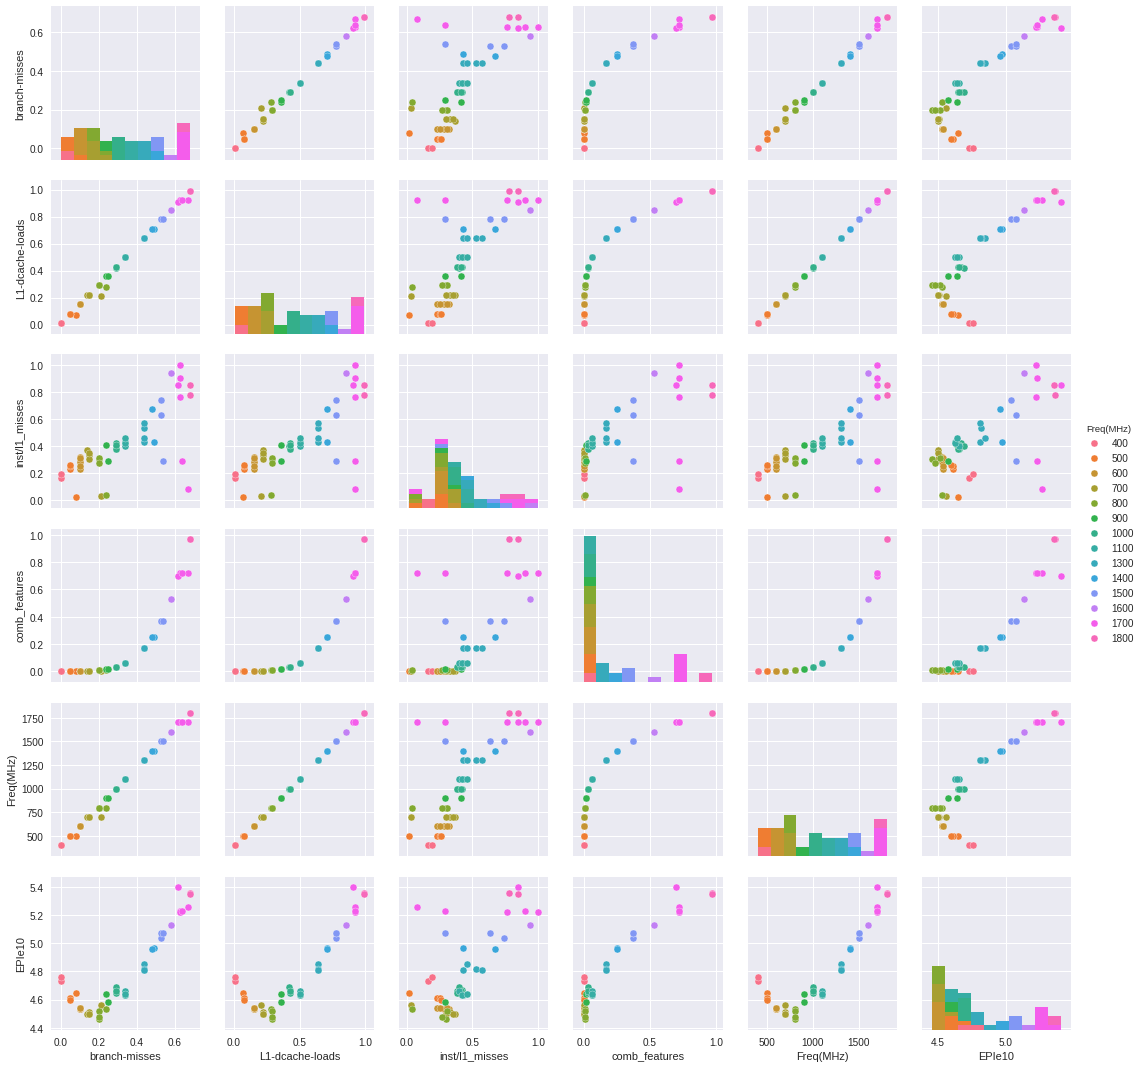

In [73]:
df_final3 = df_final3.sample(frac=1).reset_index(drop=True)
sns.pairplot(df_final3[:50], hue="Freq(MHz)")
# the pair plot tell us that there is strong correlation between all the parameters and EPIe10.. yay!

In [74]:
# split the final normalized and rounded dataset into X and y
df_final3.head()

,branch-misses,L1-dcache-loads,inst/l1_misses,comb_features,Freq(MHz),EPIe10
0,0.63,0.92,0.76,0.72,1700,5.22
1,0.53,0.78,0.74,0.37,1500,5.04
2,0.29,0.43,0.38,0.03,1000,4.66
3,0.10,0.15,0.30,0.00,600,4.54
4,0.20,0.29,0.30,0.01,800,4.46


In [75]:
X_final = df_final3[['branch-misses',
                     'L1-dcache-loads',
                     'inst/l1_misses',
                     'comb_features',
                     'Freq(MHz)']]
y_final = df_final3["EPIe10"]

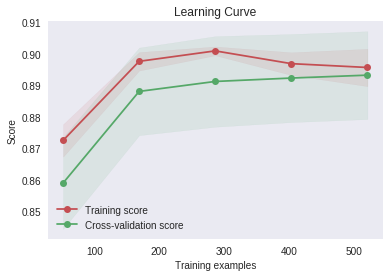

In [88]:
from scikitplot import plotters as skplt
from sklearn.linear_model import LinearRegression, Ridge
skplt.plot_learning_curve(Ridge(alpha=1), X_final, y_final, n_jobs=4)

In [77]:
# Here we used Ridge regression for:
    # 1. To prevent possible overfitting by l2 regularization
    # 2. As we have highly correlated features,
    #    it will in someways normalize the corelation or distribute the coeffecients
    #    of regression among the features depending upon the correlation.